<a href="https://colab.research.google.com/github/JunsooJung/Python25Study/blob/main/01_01_mbc%EB%A7%88%EC%BC%93%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

머신러닝 알고리즘은 지도학습과 비지도학습으로 나누어진다.

1. 지도 학습은 훈련하기 위한 데이터와 정답이 준비되어 있다.
2. 비지도 학습은 정답이 없는 대량의 학습자료가 필요하다.

지도학습에서 데이터와 정답을 코드로 입력해서 전처리를 해야한다. 이 때 데이터를 input에, 정답을 target이라는 변수에 넣어 진행한다.

input과 target을 합쳐서 훈련데이터(Training Data)라고 한다.

입력으로 사용된 길이와 무게 -> 특성(feature)라고 함.

대부분 수치자료를 이용해서 판단하고 학습하며 분석할 수 있는 기법을 알아보자.


#문제상태문
mbc 마켓에서는 살아있는 생선을 최초로 판매하려고 함.

고객이 주문 할 떄, 가장 빠르게 배송할 수 있는 물류 센터에서 즉시 배송.

문제점 : 생선 포장 직원이 생선의 종류를 모름.

ip카메라 활용, 수족관 촬영 및 객체 추적 기술로 분류.

1차 분별, 사이즈 활용 도미/빙어 머신러닝

전처리 데이터 필요함.



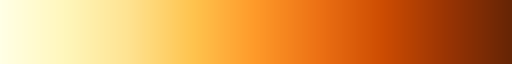

In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


sns.color_palette("YlOrBr", as_cmap=True)

In [7]:
# 도미 생선의 길이 : bream_length 도미용 길이 리스트
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7, 31.0, 31.0,
                31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5, 34.0, 34.0, 34.5, 35.0,
                35.0, 35.0, 35.0, 36.0, 36.0, 37.0, 38.5, 38.5, 39.5, 41.0, 41.0]

# 도미 생선의 무게 : bream_weigh 도미용 무게 리스트
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0, 475.0, 500.0,
                500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0,
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 925.0, 975.0, 950.0]

bream = pd.DataFrame({'length': bream_length, 'weight': bream_weight})
bream.head()



,length,weight
0,25.4,242.0
1,26.3,290.0
2,26.5,340.0
3,29.0,363.0
4,29.0,430.0


특성은 데이터의 특징. (수치, 이미지, 배열자료 등)

도미의 특성 현재 = 길이/ 무게

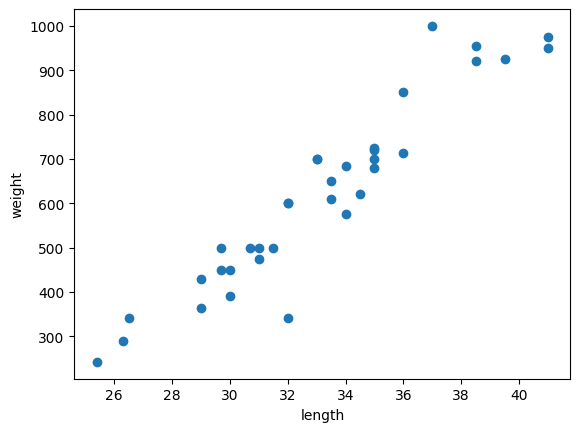

In [19]:
x = bream.length
y = bream.weight

plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(x,y)
plt.show()

In [26]:
# 빙어 생선의 길이 : bream_length 도미용 길이 리스트
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2, 12.4, 13.0, 14.3, 15.0]

# 빙어 생선의 무게 : bream_weigh 도미용 무게 리스트
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4, 12.2, 19.7, 19.9]
smelt = pd.DataFrame({'length': smelt_length, 'weight': smelt_weight})
smelt.head()

,length,weight
0,9.8,6.7
1,10.5,7.5
2,10.6,7.0
3,11.0,9.7
4,11.2,9.8


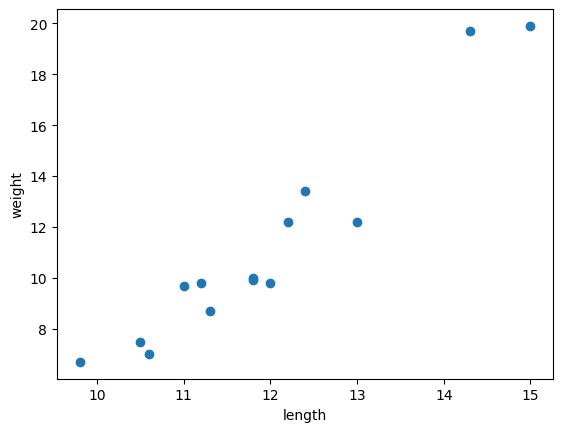

In [27]:
x = smelt.length
y = smelt.weight

plt.xlabel('length')
plt.ylabel('weight')
plt.scatter(x,y)
plt.show()

In [50]:
fish = pd.concat([bream,smelt],keys=['bream','smelt'], names=['type']).reset_index(level='type')
fish.head()

,type,length,weight
0,bream,25.4,242.0
1,bream,26.3,290.0
2,bream,26.5,340.0
3,bream,29.0,363.0
4,bream,29.0,430.0


In [51]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 49 entries, 0 to 13
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   type    49 non-null     object 
 1   length  49 non-null     float64
 2   weight  49 non-null     float64
dtypes: float64(2), object(1)
memory usage: 1.5+ KB


In [49]:
fish["type"].value_counts()

,count
type,
bream,35
smelt,14


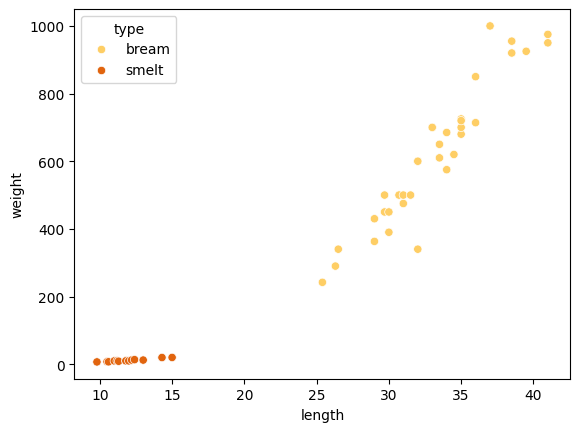

In [44]:
sns.scatterplot(data=fish, x='length', y='weight', hue='type', palette="YlOrBr")
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

데이터 전처리 및 라벨링 완료.

사이킷런 활용한 머신러닝 실행

In [69]:
X = fish[['length','weight']]
y = fish['type']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, test_size=.2)

t = DecisionTreeClassifier()
t.fit(X_train, y_train)
#t.score(X_test, y_test)
treeprd = t.predict(X_test)
accuracy_score(y_test, treeprd)


1.0

In [70]:
k = KNeighborsClassifier()
k.fit(X_train, y_train)
#k.score(X_test, y_test)
kprd = k.predict(X_test)
accuracy_score(y_test, kprd)


1.0

In [77]:
k.predict([[30,150]])

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


array(['smelt'], dtype=object)

In [80]:
print(k._fit_X)

[[ 29.7 450. ]
 [ 33.  700. ]
 [ 35.  680. ]
 [ 32.  600. ]
 [ 38.5 955. ]
 [ 31.  500. ]
 [ 30.7 500. ]
 [ 32.  600. ]
 [ 25.4 242. ]
 [ 12.    9.8]
 [ 33.5 610. ]
 [ 32.  340. ]
 [ 41.  975. ]
 [ 33.5 650. ]
 [ 41.  950. ]
 [ 35.  700. ]
 [ 38.5 920. ]
 [ 33.  700. ]
 [ 11.2   9.8]
 [ 14.3  19.7]
 [ 10.5   7.5]
 [ 30.  450. ]
 [ 36.  714. ]
 [ 11.8  10. ]
 [ 29.7 500. ]
 [ 12.2  12.2]
 [ 34.  575. ]
 [  9.8   6.7]
 [ 36.  850. ]
 [ 34.  685. ]
 [ 10.6   7. ]
 [ 26.3 290. ]
 [ 30.  390. ]
 [ 35.  720. ]
 [ 11.    9.7]
 [ 29.  430. ]
 [ 35.  725. ]
 [ 12.4  13.4]
 [ 31.5 500. ]]


In [81]:
print(k._fit_method)

kd_tree


In [83]:
print(k._y)

[0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 0 0 1 0 0 0 1 0 0
 1 0]


In [84]:
print(k.predict([[5,15]]))

['smelt']


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [86]:
k49 = KNeighborsClassifier(n_neighbors=39)
k49.fit(X_train, y_train)
k49prd = k49.predict(X_test)
accuracy_score(y_test, k49prd)

0.6